In [141]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
sns.set(style="whitegrid")

In [53]:
data = pd.read_csv("dubai_properties.csv")

In [54]:
data

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65,Yas Island,Abu Dhabi,24.494022,54.607372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73737,"Al Huboob 1, Al Salamah, Umm Al Quwain",14000,0,1,Apartment,419,33.412888,Low,Yearly,Unfurnished,For Rent,2023-12-14,129,Al Salamah,Umm Al Quwain,25.493412,55.575994
73738,"Umm Al Quwain Marina, Umm Al Quwain",14000,0,1,Apartment,500,28.000000,Low,Yearly,Unfurnished,For Rent,2023-12-14,129,Umm Al Quwain Marina,Umm Al Quwain,25.527959,55.606527
73739,"King Faisal Street, Umm Al Quwain",50000,3,4,Apartment,2000,25.000000,Low,Yearly,Unfurnished,For Rent,2024-01-02,110,King Faisal Street,Umm Al Quwain,NaN,NaN
73740,"Al Maqtaa, Umm Al Quwain",37000,1,2,Apartment,989,37.411527,Low,Yearly,Unfurnished,For Rent,2023-10-23,181,Al Maqtaa,Umm Al Quwain,NaN,NaN


In [55]:
data.head()

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65,Yas Island,Abu Dhabi,24.494022,54.607372


In [56]:
data.describe()

,Rent,Beds,Baths,Area_in_sqft,Rent_per_sqft,Age_of_listing_in_days,Latitude,Longitude
count,7.374200e+04,73742.000000,73742.000000,73742.000000,73742.000000,73742.000000,73023.000000,73023.000000
mean,1.479250e+05,2.162811,2.650213,2054.053552,88.057754,74.261547,24.918929,55.053133
std,3.069658e+05,1.578155,1.632997,3003.919252,66.534400,72.346767,0.569356,0.653722
min,0.000000e+00,0.000000,1.000000,74.000000,0.000000,11.000000,15.175847,43.351928
25%,5.499900e+04,1.000000,2.000000,850.000000,39.977778,30.000000,24.493598,54.607372
50%,9.800000e+04,2.000000,2.000000,1334.000000,71.428571,52.000000,25.078641,55.238209
75%,1.700000e+05,3.000000,3.000000,2130.000000,118.483412,95.000000,25.197978,55.367138
max,5.500000e+07,12.000000,11.000000,210254.000000,2182.044888,2276.000000,25.920310,56.361294


In [57]:
data.isnull().sum()

Address                     0
Rent                        0
Beds                        0
Baths                       0
Type                        0
Area_in_sqft                0
Rent_per_sqft               0
Rent_category               0
Frequency                   0
Furnishing                  0
Purpose                     0
Posted_date                 0
Age_of_listing_in_days      0
Location                    0
City                        0
Latitude                  719
Longitude                 719
dtype: int64

In [58]:
data.duplicated().sum()

0

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Address                 73742 non-null  object 
 1   Rent                    73742 non-null  int64  
 2   Beds                    73742 non-null  int64  
 3   Baths                   73742 non-null  int64  
 4   Type                    73742 non-null  object 
 5   Area_in_sqft            73742 non-null  int64  
 6   Rent_per_sqft           73742 non-null  float64
 7   Rent_category           73742 non-null  object 
 8   Frequency               73742 non-null  object 
 9   Furnishing              73742 non-null  object 
 10  Purpose                 73742 non-null  object 
 11  Posted_date             73742 non-null  object 
 12  Age_of_listing_in_days  73742 non-null  int64  
 13  Location                73742 non-null  object 
 14  City                    73742 non-null

In [60]:
le = LabelEncoder()
data['Address'] = le.fit_transform(data['Address'])
data['Type'] = le.fit_transform(data['Type'])
data['Rent_category'] = le.fit_transform(data['Rent_category'])
data['Furnishing'] = le.fit_transform(data['Furnishing'])
data['Location'] = le.fit_transform(data['Location'])
data['City'] = le.fit_transform(data['City'])
data

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,4023,124000,3,4,0,1785,69.467787,2,Yearly,1,For Rent,2024-03-07,45,167,0,24.493598,54.407841
1,4344,140000,3,4,0,1422,98.452883,2,Yearly,1,For Rent,2024-03-08,44,435,0,24.494022,54.607372
2,706,99000,2,3,0,1314,75.342466,2,Yearly,0,For Rent,2024-03-21,31,149,0,24.485931,54.600939
3,2773,220000,3,4,2,3843,57.246942,0,Yearly,1,For Rent,2024-02-24,57,167,0,24.493598,54.407841
4,4358,350000,5,7,7,6860,51.020408,0,Yearly,1,For Rent,2024-02-16,65,435,0,24.494022,54.607372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73737,368,14000,0,1,0,419,33.412888,1,Yearly,1,For Rent,2023-12-14,129,180,7,25.493412,55.575994
73738,4246,14000,0,1,0,500,28.000000,1,Yearly,1,For Rent,2023-12-14,129,425,7,25.527959,55.606527
73739,2495,50000,3,4,0,2000,25.000000,1,Yearly,1,For Rent,2024-01-02,110,328,7,NaN,NaN
73740,526,37000,1,2,0,989,37.411527,1,Yearly,1,For Rent,2023-10-23,181,103,7,NaN,NaN


In [61]:
data.drop(columns=['Purpose', 'Posted_date', 'Age_of_listing_in_days', 'Frequency'], inplace=True)

In [62]:
data

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Furnishing,Location,City,Latitude,Longitude
0,4023,124000,3,4,0,1785,69.467787,2,1,167,0,24.493598,54.407841
1,4344,140000,3,4,0,1422,98.452883,2,1,435,0,24.494022,54.607372
2,706,99000,2,3,0,1314,75.342466,2,0,149,0,24.485931,54.600939
3,2773,220000,3,4,2,3843,57.246942,0,1,167,0,24.493598,54.407841
4,4358,350000,5,7,7,6860,51.020408,0,1,435,0,24.494022,54.607372
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73737,368,14000,0,1,0,419,33.412888,1,1,180,7,25.493412,55.575994
73738,4246,14000,0,1,0,500,28.000000,1,1,425,7,25.527959,55.606527
73739,2495,50000,3,4,0,2000,25.000000,1,1,328,7,NaN,NaN
73740,526,37000,1,2,0,989,37.411527,1,1,103,7,NaN,NaN


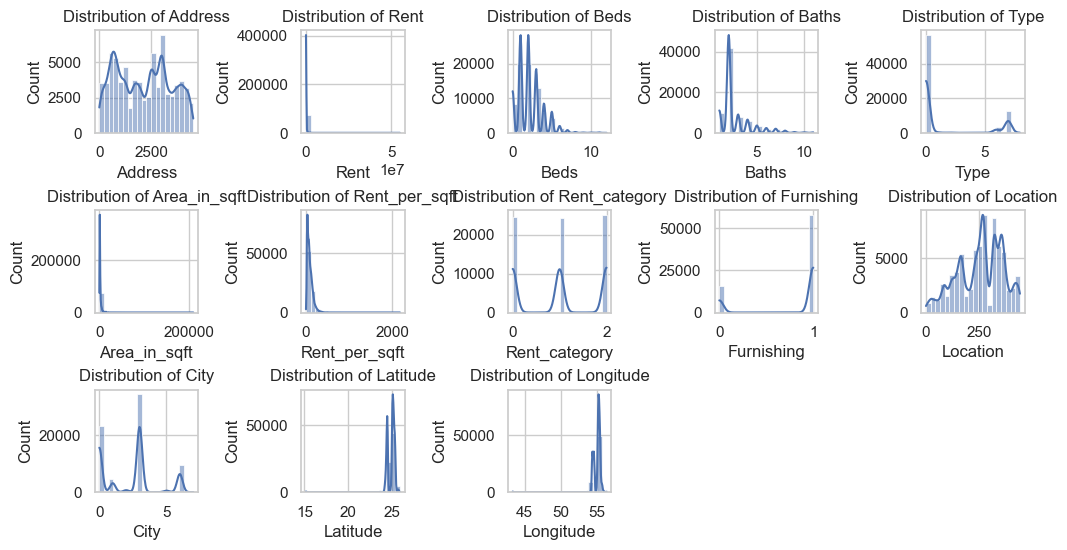

In [68]:
plt.figure(figsize=(12,6))
for i, feature in enumerate(data.columns):
    plt.subplot(3,5,i+1)
    sns.histplot(data[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
plt.subplots_adjust(wspace=1, hspace=0.75)
plt.show()

In [69]:
X = data.drop(columns=['Rent'], axis=1)
y = data['Rent']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [91]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

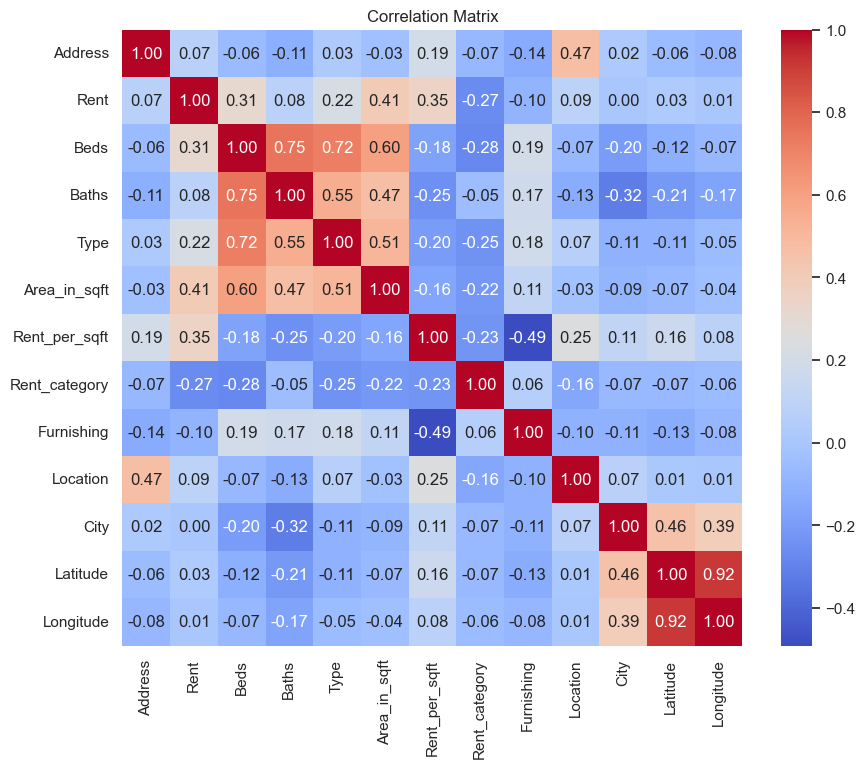

In [93]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Ridge

### Without Hyperparameter Tuning

In [94]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [117]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

In [118]:
metrics_dict = {
    'R^2': [r2],
    'MSE': [mse],
    'MAE': [mae],
    'MAPE': [mape]
}

In [119]:
metrics_df = pd.DataFrame(metrics_dict, index=['Ridge'])

In [120]:
metrics_df

,R^2,MSE,MAE,MAPE
Ridge,0.257366,1.508825e+11,62868.727254,1.110828e+17


### With Hyperparameter Tuning

In [121]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge = Ridge()

In [122]:
ridge_cv = GridSearchCV(ridge, param_grid, cv=5)

In [123]:
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

In [124]:
y_pred = ridge_cv.predict(X_test)

In [125]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

In [129]:
metrics = {
    'R^2': r2,
    'MSE': mse,
    'MAE': mae,
    'MAPE': mape
}

In [130]:
metrics_df.loc['Ridge w/ Hyperparameter Tuning'] = metrics

In [131]:
metrics_df

,R^2,MSE,MAE,MAPE
Ridge,0.257366,150882452562.163147,62868.727254,111082835289040432.0
Ridge w/ Hyperparameter Tuning,0.257366,150882435450.678986,62869.430013,111084351055554960.0


# Lasso

### Without Hyperparameter Tuning

In [132]:
lasso_reg = Lasso()

In [133]:
lasso_reg.fit(X_train, y_train)
y_pred = lasso_reg.predict(X_test)

In [134]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

In [135]:
metrics = {
    'R^2': r2,
    'MSE': mse,
    'MAE': mae,
    'MAPE': mape
}

In [136]:
metrics_df.loc['Lasso'] = metrics

In [137]:
metrics_df

,R^2,MSE,MAE,MAPE
Ridge,0.257366,150882452562.163147,62868.727254,111082835289040432.0
Ridge w/ Hyperparameter Tuning,0.257366,150882435450.678986,62869.430013,111084351055554960.0
Lasso,0.257366,150882362932.043793,62868.592866,111082423088894592.0


### With Hyperparameter Tuning

In [148]:
lasso = lasso_cv = LassoCV(cv=5, random_state=0)

In [149]:
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

In [150]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

In [151]:
metrics = {
    'R^2': r2,
    'MSE': mse,
    'MAE': mae,
    'MAPE': mape
}

In [152]:
metrics_df.loc['Lasso w/ Hyperparameter Tuning'] = metrics

In [153]:
metrics_df

,R^2,MSE,MAE,MAPE
Ridge,0.257366,150882452562.163147,62868.727254,111082835289040432.0
Ridge w/ Hyperparameter Tuning,0.257366,150882435450.678986,62869.430013,111084351055554960.0
Lasso,0.257366,150882362932.043793,62868.592866,111082423088894592.0
Lasso w/ Hyperparameter Tuning,0.256283,151102404921.776672,62485.617196,81677210474997936.0


# Random Forest

### Without Hyperparameter Tuning

In [154]:
rf = RandomForestRegressor()

In [155]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [158]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

In [161]:
metrics = {
    'R^2': r2,
    'MSE': mse,
    'MAE': mae,
    'MAPE': mape
}

In [162]:
metrics_df.loc['RF'] = metrics

In [163]:
metrics_df

,R^2,MSE,MAE,MAPE
Ridge,0.257366,150882452562.163147,62868.727254,111082835289040432.0
Ridge w/ Hyperparameter Tuning,0.257366,150882435450.678986,62869.430013,111084351055554960.0
Lasso,0.257366,150882362932.043793,62868.592866,111082423088894592.0
Lasso w/ Hyperparameter Tuning,0.256283,151102404921.776672,62485.617196,81677210474997936.0
RF,0.416497,118551477543.69281,4916.597048,3301338229942376.0


### With Hyperparameter Tuning

In [164]:
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [175]:
rf_grid = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2,
                            scoring='r2')

In [176]:
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


KeyboardInterrupt: 

In [177]:
y_pred = rf_grid.predict(X_test)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [169]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

In [170]:
metrics = {
    'R^2': r2,
    'MSE': mse,
    'MAE': mae,
    'MAPE': mape
}

In [171]:
metrics_df.loc['RF w/ Hyperparameter Tuning'] = metrics

In [172]:
metrics_df

,R^2,MSE,MAE,MAPE
Ridge,0.257366,150882452562.163147,62868.727254,111082835289040432.0
Ridge w/ Hyperparameter Tuning,0.257366,150882435450.678986,62869.430013,111084351055554960.0
Lasso,0.257366,150882362932.043793,62868.592866,111082423088894592.0
Lasso w/ Hyperparameter Tuning,0.256283,151102404921.776672,62485.617196,81677210474997936.0
RF,0.416497,118551477543.69281,4916.597048,3301338229942376.0
RF w/ Hyperparameter Tuning,0.415443,118765601825.485733,4860.368807,3664065794126248.0


# OLS

In [181]:
ols = sm.OLS(y_train, X_train).fit()

In [186]:
y_pred = ols.predict(X_test)

In [187]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Rent   R-squared (uncentered):                   0.694
Model:                            OLS   Adj. R-squared (uncentered):              0.694
Method:                 Least Squares   F-statistic:                              9768.
Date:                Sun, 05 May 2024   Prob (F-statistic):                        0.00
Time:                        17:16:57   Log-Likelihood:                     -6.8674e+05
No. Observations:               51619   AIC:                                  1.373e+06
Df Residuals:                   51607   BIC:                                  1.374e+06
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.6162      0.572      4.571      0.000       1.494       3.738
x2          6.946e+04    801.503     86.659      0.000    6.79e+04     7.1e+04
x3         -4.129e+04    641.004    -64.413      0.000   -4.25e+04      -4e+04
x4          3741.3534    337.084     11.099      0.000    3080.666    4402.041
x5            20.4095      0.260     78.615      0.000      19.901      20.918
x6          1787.7975     11.900    150.239      0.000    1764.474    1811.121
x7         -1.344e+04    885.072    -15.180      0.000   -1.52e+04   -1.17e+04
x8          2.798e+04   1821.395     15.364      0.000    2.44e+04    3.16e+04
x9           -43.8784      7.214     -6.083      0.000     -58.017     -29.740
x10        -1709.6129    377.704     -4.526      0.000   -2449.916    -969.310
x11        -2434.1129   2289.661     -1.063      0.288   -6921.872    2053.646
x12         -686.4090   1036.601     -0.662      0.508   -2718.158    1345.340
==============================================================================
Omnibus:                    86637.594   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        226374254.152
Skew:                          11.003   Prob(JB):                         0.00
Kurtosis:                     326.678   Cond. No.                     1.57e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [188]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

In [189]:
metrics = {
    'R^2': r2,
    'MSE': mse,
    'MAE': mae,
    'MAPE': mape
}

In [190]:
metrics_df.loc['OLS'] = metrics

In [191]:
metrics_df

,R^2,MSE,MAE,MAPE
Ridge,0.257366,150882452562.163147,62868.727254,111082835289040432.0
Ridge w/ Hyperparameter Tuning,0.257366,150882435450.678986,62869.430013,111084351055554960.0
Lasso,0.257366,150882362932.043793,62868.592866,111082423088894592.0
Lasso w/ Hyperparameter Tuning,0.256283,151102404921.776672,62485.617196,81677210474997936.0
RF,0.416497,118551477543.69281,4916.597048,3301338229942376.0
RF w/ Hyperparameter Tuning,0.415443,118765601825.485733,4860.368807,3664065794126248.0
OLS,0.257374,150880684699.784454,63023.335515,110618639053232656.0


Text(0.5, 0, 'Model')

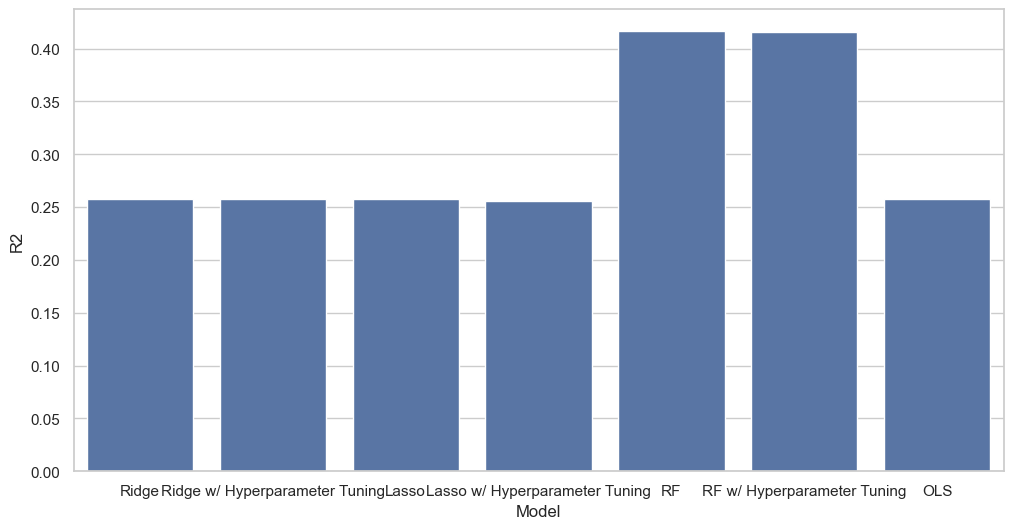

In [202]:
plt.figure(figsize=(12,6))
sns.barplot(data=metrics_df, x=metrics_df.index, y='R^2')
plt.ylabel('R2')
plt.xlabel('Model')

Text(0.5, 0, 'Model')

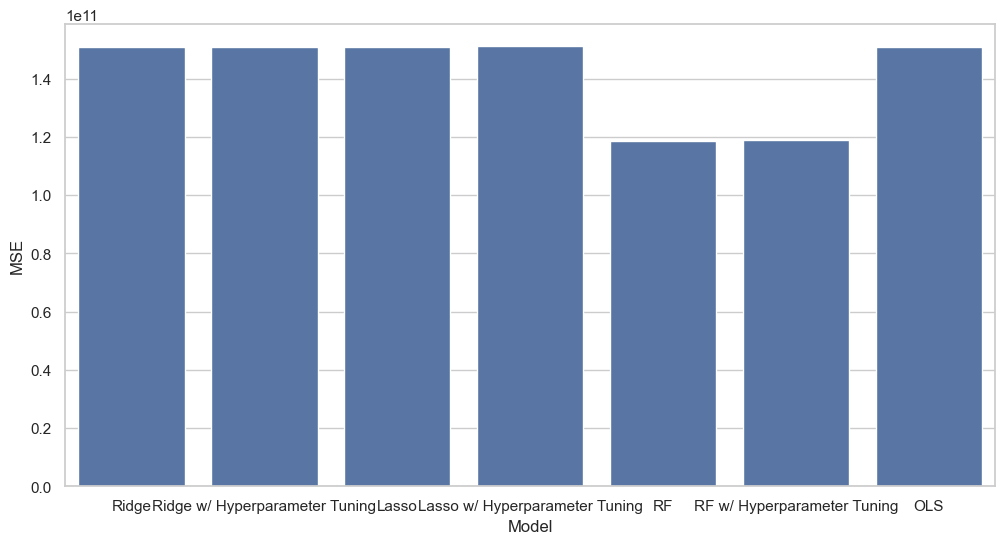

In [201]:
plt.figure(figsize=(12,6))
sns.barplot(data=metrics_df, x=metrics_df.index, y='MSE')
plt.ylabel('MSE')
plt.xlabel('Model')

Text(0.5, 0, 'Model')

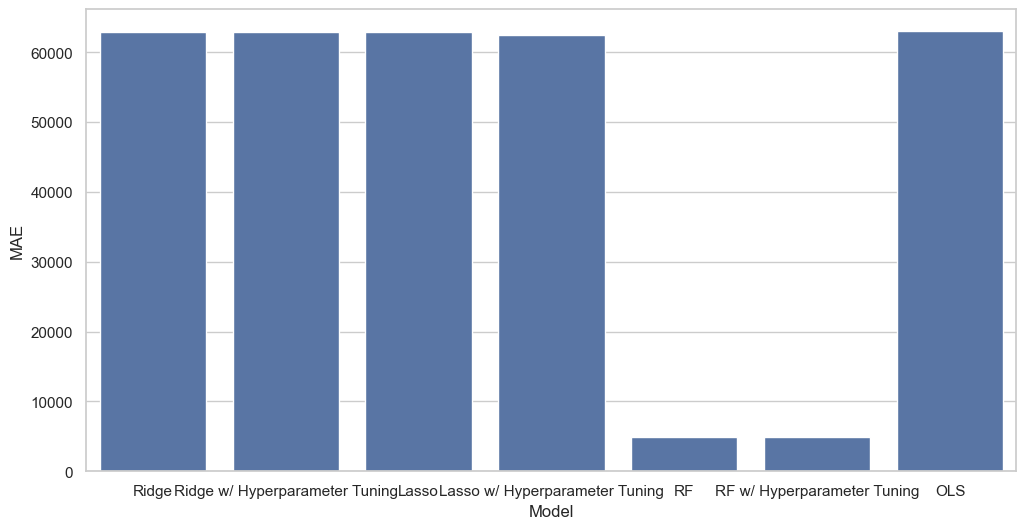

In [203]:
plt.figure(figsize=(12,6))
sns.barplot(data=metrics_df, x=metrics_df.index, y='MAE')
plt.ylabel('MAE')
plt.xlabel('Model')

Text(0.5, 0, 'Model')

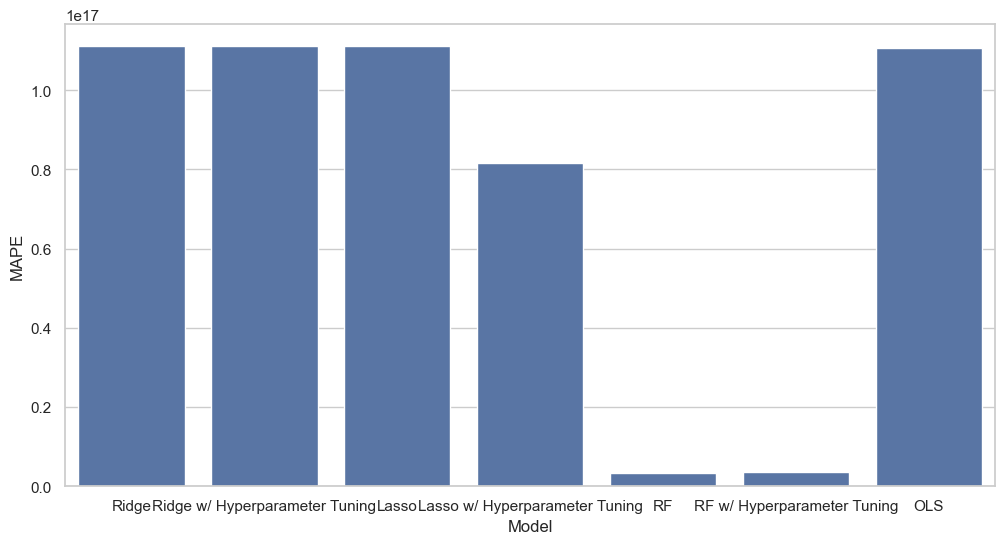

In [204]:
plt.figure(figsize=(12,6))
sns.barplot(data=metrics_df, x=metrics_df.index, y='MAPE')
plt.ylabel('MAPE')
plt.xlabel('Model')